# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average or X-day ma
    2. The SPY closes at a 7-day low, buy.
    3. If the SPY closes at a 7-day high, sell your long position.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
#symbol = 'OIH'

capital = 10000
start = datetime.datetime(1900, 1, 1)
start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()

Run Strategy

In [4]:
s = strategy.Strategy(symbol, capital, start, end, stop_loss_pct=85, margin=1.5, period=7, sma=70)
s.run()

Retrieve log DataFrames

In [5]:
tlog, dbal = s.get_logs()
stats = s.get_stats()

In [6]:
tlog.tail()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
285,2019-12-03,304.89,2019-12-12,312.36,7.47,10235.89,1371,278999.14,LONG,SPY
286,2020-01-27,320.20,2020-02-04,325.70,5.50,7445.92,1353,286445.06,LONG,SPY
287,2020-02-21,330.08,2020-03-04,309.67,-20.41,-27491.82,1347,258953.24,LONG,SPY
288,2020-06-11,299.29,2020-06-23,312.05,12.76,17183.75,1347,276136.99,LONG,SPY
289,2020-06-24,304.09,2020-07-02,312.23,8.14,11485.56,1411,287622.55,LONG,SPY


In [7]:
dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2020-07-17,297622.55,297622.55,297622.55,0,297622.55,1.00,-
2020-07-20,297622.55,297622.55,297622.55,0,297622.55,1.00,-
2020-07-21,297622.55,297622.55,297622.55,0,297622.55,1.00,-
2020-07-22,297622.55,297622.55,297622.55,0,297622.55,1.00,-
2020-07-23,297622.55,297622.55,297622.55,0,297622.55,1.00,-


Generate strategy stats - display all available stats

In [8]:
pf.print_full(stats)

start                                                   1993-11-11
end                                                     2020-07-23
beginning_balance                                            10000
ending_balance                                           297622.55
total_net_profit                                         287622.55
gross_profit                                             517448.86
gross_loss                                              -229826.31
profit_factor                                                 2.25
return_on_initial_capital                                  2876.23
annual_return_rate                                           13.55
trading_period                           26 years 8 months 12 days
pct_time_in_market                                           31.97
margin                                                        1.50
avg_leverage                                                  1.16
max_leverage                                                  

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [9]:
benchmark = pf.Benchmark(symbol, capital, s.start, s.end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1993-11-11 00:00:00 BUY  215 SPY @ 46.38
2020-07-23 00:00:00 SELL 215 SPY @ 322.28


Plot Equity Curves: Strategy vs Benchmark

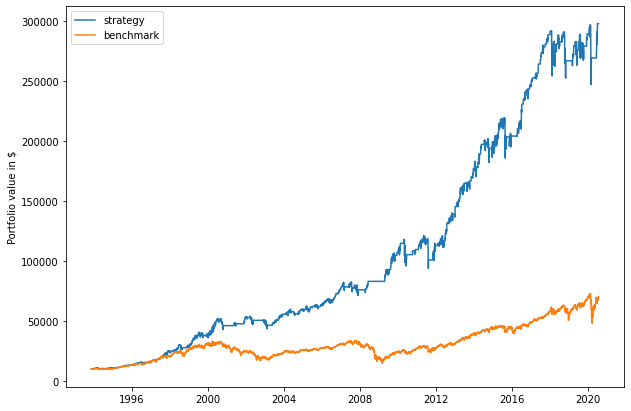

In [10]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

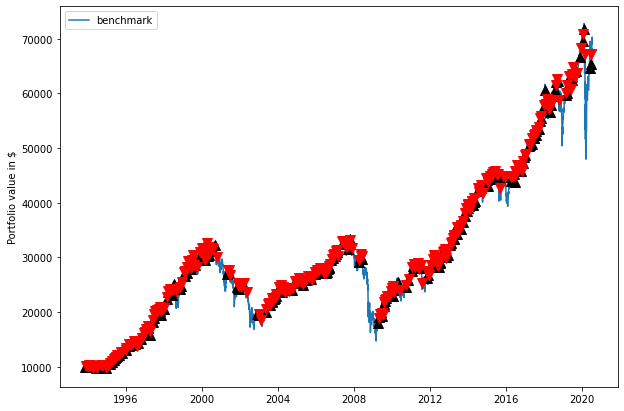

In [11]:
pf.plot_trades(dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,13.55,7.52
max_closed_out_drawdown,-22.82,-56.42
drawdown_annualized_return,-1.68,-7.50
drawdown_recovery,-0.25,-1.42
best_month,20.13,23.06
worst_month,-20.38,-31.38
sharpe_ratio,0.89,0.48
sortino_ratio,0.69,0.60
monthly_std,3.36,4.54


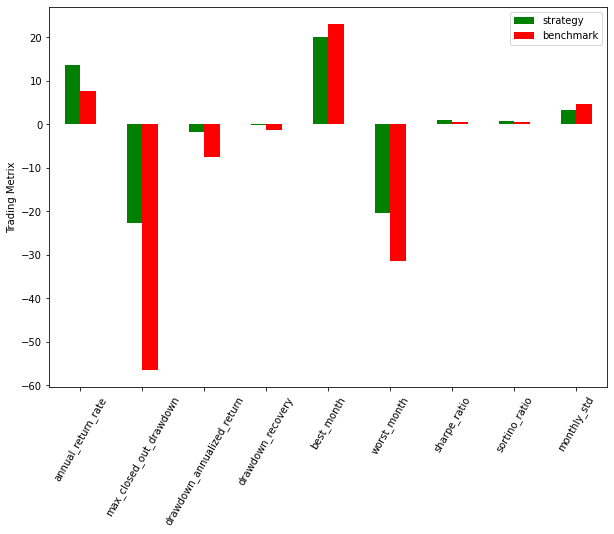

In [12]:
df = pf.plot_bar_graph(stats, benchmark.stats)
df

In [13]:
returns = dbal['close']
returns.tail()

date
2020-07-17   297622.55
2020-07-20   297622.55
2020-07-21   297622.55
2020-07-22   297622.55
2020-07-23   297622.55
Name: close, dtype: float64

In [14]:
benchmark_returns = benchmark.dbal['close']
benchmark_returns.tail()

date
2020-07-17   69199.18
2020-07-20   69758.18
2020-07-21   69906.53
2020-07-22   70304.27
2020-07-23   69319.57
Name: close, dtype: float64

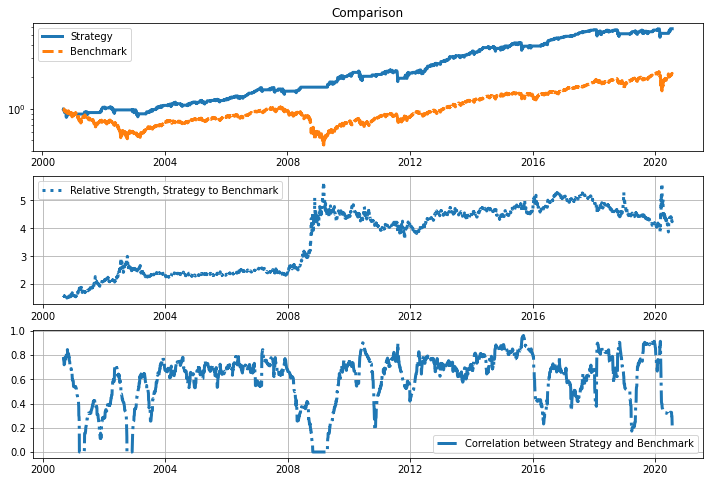

In [15]:
pf.prettier_graphs(returns, benchmark_returns, label1='Strategy', label2='Benchmark', points_to_plot=5000)